In [65]:
import pandas as pd
from scipy.io import arff

# Load the ARFF file
data, meta = arff.loadarff('BeetleFly_TRAIN.arff')

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Convert byte strings to regular strings (if needed)
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].str.decode("utf-8")

# Create a new DataFrame with "id," "values," and "class" columns
new_data = []

# Loop through each row in the original DataFrame
for idx, row in df.iterrows():
    # Extract the first 512 elements
    values = row.iloc[:512].tolist()
    
    # Get the last element as the class value
    class_value = row.iloc[-1]
    
    # Duplicate "id" and "class" for each element in the array
    for value in values:
        new_data.append({"id": idx, "values": value, "class": class_value})

# Create the new DataFrame
train_df = pd.DataFrame(new_data)

train_df["values"] = train_df["values"].apply(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

# Display the new DataFrame
print(train_df)

test_data, test_meta = arff.loadarff('BeetleFly_TEST.arff')
test_df = pd.DataFrame(test_data)
new_data = []

for idx, row in test_df.iterrows():
    # Extract the first 512 elements
    values = row.iloc[:512].tolist()
    
    # Get the last element as the class value
    class_value = row.iloc[-1]
    
    # Duplicate "id" and "class" for each element in the array
    for value in values:
        new_data.append({"id": idx, "values": value})
# Convert the data to a pandas DataFrame
test_df = pd.DataFrame(new_data)
test_df["values"] = test_df["values"].apply(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)
print(test_df)



       id  values class
0       0   1.247     1
1       0   1.175     1
2       0   1.069     1
3       0   0.964     1
4       0   0.895     1
...    ..     ...   ...
10235  19   0.795     2
10236  19   0.916     2
10237  19   1.037     2
10238  19   1.197     2
10239  19   1.318     2

[10240 rows x 3 columns]
       id  values
0       0   1.740
1       0   1.733
2       0   1.709
3       0   1.633
4       0   1.541
...    ..     ...
10235  19   1.783
10236  19   1.873
10237  19   1.925
10238  19   2.017
10239  19   2.079

[10240 rows x 2 columns]


In [66]:
# Check for null values in the DataFrame
null_values = train_df.isnull()

# Get the count of null values for each column
null_count = null_values.sum()

# Display the count of null values for each column
print(null_count)

id        0
values    0
class     0
dtype: int64


In [67]:
# Check for null values in the DataFrame
null_values = test_df.isnull()

# Get the count of null values for each column
null_count = null_values.sum()

# Display the count of null values for each column
print(null_count)

id        0
values    0
dtype: int64


In [68]:
class1_train_data= train_df[train_df['class']=='1']
display(class1_train_data)

,id,values,class
0,0,1.247,1
1,0,1.175,1
2,0,1.069,1
3,0,0.964,1
4,0,0.895,1
...,...,...,...
5115,9,1.300,1
5116,9,1.396,1
5117,9,1.479,1
5118,9,1.610,1


In [69]:
class2_train_data= train_df[train_df['class']=='2']
display(class2_train_data)

,id,values,class
5120,10,2.506,2
5121,10,2.479,2
5122,10,2.455,2
5123,10,2.434,2
5124,10,2.421,2
...,...,...,...
10235,19,0.795,2
10236,19,0.916,2
10237,19,1.037,2
10238,19,1.197,2


In [70]:
import plotly.express as px
from scipy.stats import mannwhitneyu

In [71]:
# Create a histogram using Plotly Express
fig = px.histogram(class1_train_data, x='values', nbins=500, title='Histogram of Values change (Class 1)')
fig.show()

In [72]:
# Create a histogram using Plotly Express
fig = px.histogram(class2_train_data, x='values', nbins=500, title='Histogram of Values Change (Class 2)')
fig.show()

In [73]:
column_stats = class1_train_data['values'].describe()
display(column_stats)

count    5120.000000
mean       -0.000001
std         0.999119
min        -2.257000
25%        -0.789250
50%        -0.050500
75%         0.688000
max         2.364000
Name: values, dtype: float64

In [74]:
column_stats = class2_train_data['values'].describe()
display(column_stats)

count    5120.000000
mean       -0.000006
std         0.999124
min        -2.517000
25%        -0.750250
50%        -0.061000
75%         0.691250
max         2.506000
Name: values, dtype: float64

In [75]:
fig = px.violin(train_df, x='class', y='values', box=True, points="all",
                color='class', labels={'class': 'Target Class', 'values': 'Price Changes'},
                title='Distribution of Price Changes by Target Class')
fig.update_traces(marker=dict(size=3))  # Customize marker size
fig.show()

In [76]:
id1_df=train_df[train_df['id']==1];
display(id1_df.head(4))

,id,values,class
512,1,0.826,1
513,1,0.881,1
514,1,0.818,1
515,1,0.674,1


In [77]:
id2_df=train_df[train_df['id']==10];
display(id2_df.head(4))

,id,values,class
5120,10,2.506,2
5121,10,2.479,2
5122,10,2.455,2
5123,10,2.434,2


In [78]:
lags = range(1, 5)
autocorrelation_results = []

for id in range(1,10):
    id_df=class1_train_data[class1_train_data['id']==id];

    for lag in lags:
        autocorr_value = id_df['values'].autocorr(lag=lag)
        autocorrelation_results.append((id, lag, autocorr_value))

In [79]:
# Create a DataFrame for the autocorrelation results
autocorr_df = pd.DataFrame(autocorrelation_results, columns=['ID', 'Lag', 'Autocorrelation'])
 
# Calculate the mean autocorrelation for each lag across all companies
mean_autocorr_df = autocorr_df.groupby('Lag')['Autocorrelation'].mean().reset_index()

# Create a line plot using Plotly Express
fig = px.line(mean_autocorr_df, x='Lag', y='Autocorrelation', title='Mean Autocorrelation of Change for class 1')
fig.show()


In [80]:
lags = range(1, 5)
autocovariance_results = []

for id in range(1, 10):
    id_df = class1_train_data[class1_train_data['id'] == id]

    for lag in lags:
        # Calculate autocovariance using the cov function
        autocov_value = id_df['values'].cov(id_df['values'].shift(lag))
        autocovariance_results.append((id, lag, autocov_value))

# Create a DataFrame for the autocovariance results
autocov_df = pd.DataFrame(autocovariance_results, columns=['ID', 'Lag', 'Autocovariance'])

# Calculate the mean autocovariance for each lag across all companies
mean_autocov_df = autocov_df.groupby('Lag')['Autocovariance'].mean().reset_index()

# Create a line plot using Plotly Express
fig = px.line(mean_autocov_df, x='Lag', y='Autocovariance', title='Mean Autocovariance of Change for class 1')
fig.show()

In [81]:
lags = range(1, 5)
autocorrelation_results = []

for id in range(10,20):
    id_df=class2_train_data[class2_train_data['id']==id];

    for lag in lags:
        autocorr_value = id_df['values'].autocorr(lag=lag)
        autocorrelation_results.append((id, lag, autocorr_value))

In [82]:
# Create a DataFrame for the autocorrelation results
autocorr_df = pd.DataFrame(autocorrelation_results, columns=['ID', 'Lag', 'Autocorrelation'])
 
# Calculate the mean autocorrelation for each lag across all companies
mean_autocorr_df = autocorr_df.groupby('Lag')['Autocorrelation'].mean().reset_index()

# Create a line plot using Plotly Express
fig = px.line(mean_autocorr_df, x='Lag', y='Autocorrelation', title='Mean Autocorrelation of Change for class 2')
fig.show()


In [83]:
lags = range(1, 5)
autocovariance_results = []

for id in range(10, 20):
    id_df = class2_train_data[class2_train_data['id'] == id]

    for lag in lags:
        # Calculate autocovariance using the cov function
        autocov_value = id_df['values'].cov(id_df['values'].shift(lag))
        autocovariance_results.append((id, lag, autocov_value))

# Create a DataFrame for the autocovariance results
autocov_df = pd.DataFrame(autocovariance_results, columns=['ID', 'Lag', 'Autocovariance'])

# Calculate the mean autocovariance for each lag across all companies
mean_autocov_df = autocov_df.groupby('Lag')['Autocovariance'].mean().reset_index()

# Create a line plot using Plotly Express
fig = px.line(mean_autocov_df, x='Lag', y='Autocovariance', title='Mean Autocovariance of Change for class 2')
fig.show()

In [84]:
window_size = 5  # You can adjust the window size as needed
moving_average_results = []

for id in range(1, 10):
    id_df = class1_train_data[class1_train_data['id'] == id]
    
    # Calculate the moving average using the rolling function
    moving_average = id_df['values'].rolling(window=window_size).mean()
    
    # Remove NaN values (resulting from the rolling window)
    moving_average = moving_average.dropna()
    
    # Store the results in the moving_average_results list
    for lag, ma_value in enumerate(moving_average, start=window_size):
        moving_average_results.append((id, lag, ma_value))

# Create a DataFrame for the moving average results
moving_average_df = pd.DataFrame(moving_average_results, columns=['ID', 'Lag', 'MovingAverage'])

# Create a line plot using Plotly Express
fig = px.line(moving_average_df, x='Lag', y='MovingAverage',color='ID', title='Moving Average for class 1')
fig.show()

In [85]:
window_size = 5  # You can adjust the window size as needed
moving_average_results = []

for id in range(10, 20):
    id_df = class2_train_data[class2_train_data['id'] == id]
    
    # Calculate the moving average using the rolling function
    moving_average = id_df['values'].rolling(window=window_size).mean()
    
    # Remove NaN values (resulting from the rolling window)
    moving_average = moving_average.dropna()
    
    # Store the results in the moving_average_results list
    for lag, ma_value in enumerate(moving_average, start=window_size):
        moving_average_results.append((id, lag, ma_value))

# Create a DataFrame for the moving average results
moving_average_df = pd.DataFrame(moving_average_results, columns=['ID', 'Lag', 'MovingAverage'])

# Create a line plot using Plotly Express
fig = px.line(moving_average_df, x='Lag', y='MovingAverage',color='ID', title='Moving Average for class 2')
fig.show()

In [86]:
import matplotlib.pyplot as plt

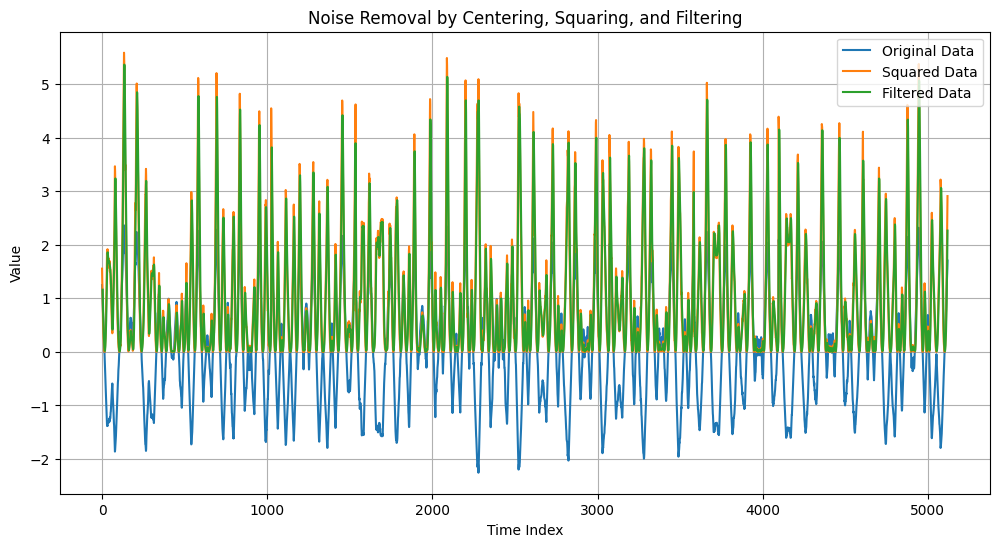

In [87]:
data_mean = class1_train_data['values'].mean()
centered_data = class1_train_data['values'] - data_mean

squared_data = centered_data ** 2

window_size = 5  # Adjust the window size as needed
filtered_data = squared_data.rolling(window=window_size).mean()
filtered_data = filtered_data.dropna()

plt.figure(figsize=(12, 6))
plt.plot(class1_train_data['values'], label='Original Data')
plt.plot(squared_data, label='Squared Data')
plt.plot(filtered_data, label='Filtered Data')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('Noise Removal by Centering, Squaring, and Filtering')
plt.legend()
plt.grid(True)
plt.show()

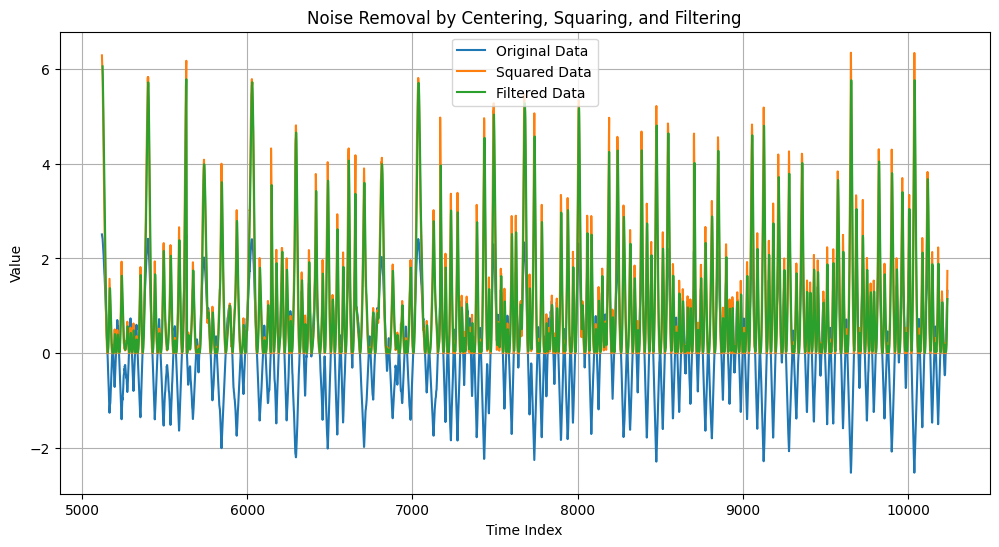

In [88]:
data_mean = class2_train_data['values'].mean()
centered_data = class2_train_data['values'] - data_mean

squared_data = centered_data ** 2

window_size = 5  # Adjust the window size as needed
filtered_data = squared_data.rolling(window=window_size).mean()
filtered_data = filtered_data.dropna()

plt.figure(figsize=(12, 6))
plt.plot(class2_train_data['values'], label='Original Data')
plt.plot(squared_data, label='Squared Data')
plt.plot(filtered_data, label='Filtered Data')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('Noise Removal by Centering, Squaring, and Filtering')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
from statsmodels.tsa.stattools import adfuller
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load your time series data
# Replace 'your_time_series.csv' with the actual path to your CSV file
# Your time series data should be in a single column named 'value'
# data = pd.read_csv('your_time_series.csv')

stationary_count = 0
non_stationary_count = 0

plot_figures = []

fig = make_subplots(rows=5, cols=4, subplot_titles=[f"Stationary ID {i}" for i in range(20)], vertical_spacing=0.15)

# Extract the values from the DataFrame
for id_value in range(20):
    id_data = train_df[train_df['id'] == id_value]['values'].explode()
    
    # Perform the ADF test
    result = adfuller(id_data)
    
    print(f"ADF Test results for ID {id_value}:")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    is_stationary = result[1] <= 0.05
    
    if is_stationary:
        print("Is the time series stationary? Yes")
        stationary_count += 1
        # Create a line plot using Plotly for stationary time series
        fig.add_trace(go.Scatter(x=id_data.index, y=id_data.values, name=f"ID {id_value}"), row=(id_value // 4) + 1, col=(id_value % 4) + 1)
    else:
        print("Is the time series stationary? No")
        non_stationary_count += 1
    
    print("-" * 40)

# Print the counts
print(f"Number of stationary time series: {stationary_count}")
print(f"Number of non-stationary time series: {non_stationary_count}")

ADF Test results for ID 0:
ADF Statistic: -4.051427633399126
p-value: 0.0011639137384751707
Critical Values: {'1%': -3.44328828958775, '5%': -2.8672462791357867, '10%': -2.569809231353463}
Is the time series stationary? Yes
----------------------------------------
ADF Test results for ID 1:
ADF Statistic: -5.981841518883635
p-value: 1.830665911213955e-07
Critical Values: {'1%': -3.4433139398425348, '5%': -2.867257567756961, '10%': -2.5698152474041915}
Is the time series stationary? Yes
----------------------------------------
ADF Test results for ID 2:
ADF Statistic: -5.063434575757937
p-value: 1.659712011846591e-05
Critical Values: {'1%': -3.4433139398425348, '5%': -2.867257567756961, '10%': -2.5698152474041915}
Is the time series stationary? Yes
----------------------------------------
ADF Test results for ID 3:
ADF Statistic: -4.790481054808197
p-value: 5.6712734792903317e-05
Critical Values: {'1%': -3.4433139398425348, '5%': -2.867257567756961, '10%': -2.5698152474041915}
Is the ti

In [90]:
# Update subplot layout
fig.update_layout(title="Line Plots for Stationary Time Series", showlegend=False)

# Display the subplot
fig.show()